<a href="https://colab.research.google.com/github/rohitcricket/3DNavigationMenuCSS/blob/master/TF1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install tensorflow-gpu==2.0.0.alpha0

     |████████████████████████████████| 332.1MB 73kB/s 
     |████████████████████████████████| 3.0MB 32.0MB/s 
     |████████████████████████████████| 419kB 55.2MB/s 


In [0]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
Temperature_df = pd.read_csv('/content/drive/My Drive/Celsius-to-Fahrenheit.csv')

In [4]:
Temperature_df.head(5)

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [5]:
Temperature_df.tail(10)

,Celsius,Fahrenheit
20,6,42.8
21,7,44.6
22,8,46.4
23,9,48.2
24,10,50.0
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [6]:
Temperature_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


In [7]:
Temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


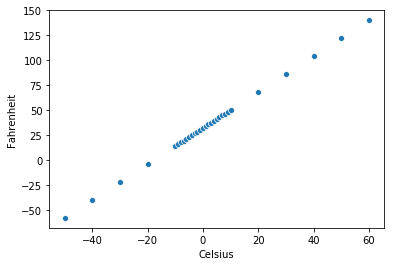

In [20]:
sns.scatterplot(Temperature_df['Celsius'], Temperature_df['Fahrenheit'])

In [0]:
X_train = Temperature_df['Celsius']
y_train = Temperature_df['Fahrenheit']

In [22]:
X_train.shape
y_train.shape

(30,)

In [0]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.5), loss='mean_squared_error')

In [33]:
epochs_hist = model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
30/30 [==============================] - 0s 2ms/sample - loss: 1042.6073
Epoch 2/100
30/30 [==============================] - 0s 119us/sample - loss: 1021.8561
Epoch 3/100
30/30 [==============================] - 0s 63us/sample - loss: 974.8806
Epoch 4/100
30/30 [==============================] - 0s 82us/sample - loss: 923.0126
Epoch 5/100
30/30 [==============================] - 0s 53us/sample - loss: 906.9775
Epoch 6/100
30/30 [==============================] - 0s 73us/sample - loss: 882.8899
Epoch 7/100
30/30 [==============================] - 0s 78us/sample - loss: 841.1557
Epoch 8/100
30/30 [==============================] - 0s 67us/sample - loss: 806.5315
Epoch 9/100
30/30 [==============================] - 0s 71us/sample - loss: 785.9788
Epoch 10/100
30/30 [==============================] - 0s 61us/sample - loss: 763.3857
Epoch 11/100
30/30 [==============================] - 0s 141us/sample - loss: 731.2017
Epoch 12/100
30/30 [==============================] - 0s 68u

In [35]:
epochs_hist.history.keys()

dict_keys(['loss'])

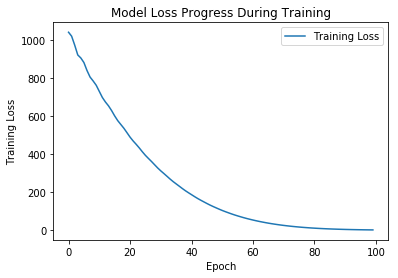

In [37]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [38]:
model.get_weights()

[array([[1.8051858]], dtype=float32), array([30.860123], dtype=float32)]

In [43]:
Temp_C = 0
Temp_F = model.predict([Temp_C])
print('Temperature in degF Using Trained ANN =', Temp_F)

Temperature in degF Using Trained ANN = [[30.860123]]


In [44]:
Temp_F = 9/5 * Temp_C + 32
print('Temperature in degF Using Equation =', Temp_F)

Temperature in degF Using Equation = 32.0
